In [ ]:
import numpy as np 

In [ ]:
# 랜덤한 값을 만들어보자. 
np.random.seed(0)
np.random.normal(0.0, 0.5)  # 첫번째 : 평균, 두번째 : 표준편차

0.882026172983832

In [ ]:
npoints = 10
points = list() 
# 직선을 만들어보자. 기울기 0.2, y절편 0.5 
for i in range(npoints):
  np.random.seed(i)
  x = np.random.normal(0.0, 0.5)
  y = 0.2 * x + 0.5 
  points.append([x, y]) 

In [ ]:
print(points)

[[0.882026172983832, 0.6764052345967664], [0.8121726818316208, 0.6624345363663242], [-0.2083789237027353, 0.45832421525945294], [0.8943142367151593, 0.6788628473430318], [0.025280853571469777, 0.505056170714294], [0.22061374344252072, 0.5441227486885042], [-0.1558918367437583, 0.4688216326512483], [0.845262851900178, 0.6690525703800356], [0.045602358309909885, 0.5091204716619819], [0.0005542773561054866, 0.5001108554712211]]


In [ ]:
import matplotlib.pyplot as plt 

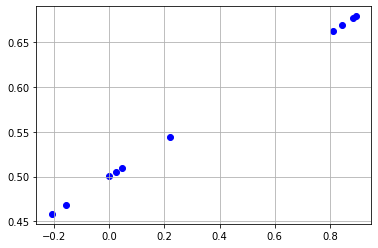

In [ ]:
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.grid()

In [ ]:
npoints = 100
points = list() 
# 잔차가 있는 데이터를 만들어보자. 기울기 0.2, y절편 0.5 
for i in range(npoints):
  np.random.seed(i)
  x = np.random.normal(0.0, 0.5)
  r = np.random.normal(0.0, 0.05)
  y = 0.2 * x + 0.5 + r
  points.append([x, y]) 

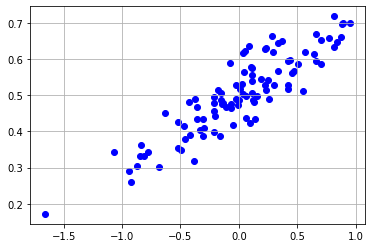

In [ ]:
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.grid()

In [ ]:
import torch

In [ ]:
dataset = torch.FloatTensor(points)

In [ ]:
print(dataset.size())

torch.Size([100, 2])


In [ ]:
x = dataset[:, 0]  # :은 all 이란 뜻이고, 0번째 것만 모아서, x만 있다. 
y = dataset[:, 1]  # y만 있다.

In [ ]:
print(x.size())

torch.Size([100])


In [ ]:
x = x.unsqueeze(1)
print(x.size())

torch.Size([100, 1])


In [ ]:
y = y.unsqueeze(1)

In [ ]:
# 기울기를 설정해보자. 
a = torch.randn(1, requires_grad=True)
print(a)

tensor([1.1444], requires_grad=True)


In [ ]:
# 편차(bias) 를 설정해보자
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# 예측을 해보자
y_pred = a * x + b

In [ ]:
# 오차를 구해보자
error = torch.mean((y - y_pred) ** 2)

In [ ]:
print(error)

tensor(0.4574, grad_fn=<MeanBackward0>)


In [ ]:
# 기울기와 편차를 업데이트해주자. 
optimizer = torch.optim.SGD([a, b], lr = 0.01)

In [ ]:
optimizer.zero_grad()  # gradient 초기화 
error.backward(retain_graph=True)  # gradient 계산 
optimizer.step()

In [ ]:
for i in range(10):
  y_pred = a * x + b
  error = torch.mean((y - y_pred) ** 2)
  optimizer.zero_grad()  # gradient 초기화 
  error.backward()  # gradient 계산 
  optimizer.step()

tensor([1.1355], requires_grad=True)
tensor([1.1310], requires_grad=True)
tensor([1.1267], requires_grad=True)
tensor([1.1223], requires_grad=True)
tensor([1.1179], requires_grad=True)
tensor([1.1136], requires_grad=True)
tensor([1.1093], requires_grad=True)
tensor([1.1050], requires_grad=True)
tensor([1.1007], requires_grad=True)
tensor([1.0964], requires_grad=True)


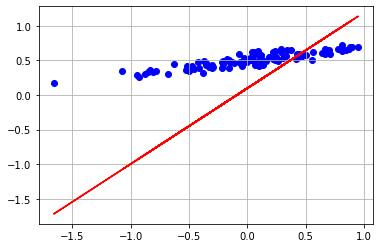

In [ ]:
y_pred = a * x + b 
xx = x.squeeze(1).data.numpy() 
yy = y_pred.squeeze(1).data.numpy()
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.plot(xx, yy, c='r')
plt.grid()

In [ ]:
for i in range(100):
  y_pred = a * x + b
  error = torch.mean((y - y_pred) ** 2)
  optimizer.zero_grad()  # gradient 초기화 
  error.backward()  # gradient 계산 
  optimizer.step()

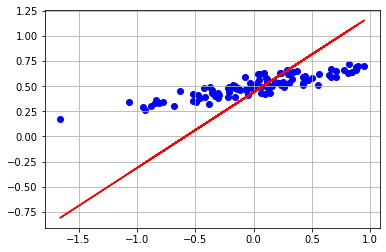

In [ ]:
y_pred = a * x + b 
xx = x.squeeze(1).data.numpy() 
yy = y_pred.squeeze(1).data.numpy()
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.plot(xx, yy, c='r')
plt.grid()

In [ ]:
for i in range(100):
  y_pred = a * x + b
  error = torch.mean((y - y_pred) ** 2)
  optimizer.zero_grad()  # gradient 초기화 
  error.backward()  # gradient 계산 
  optimizer.step()

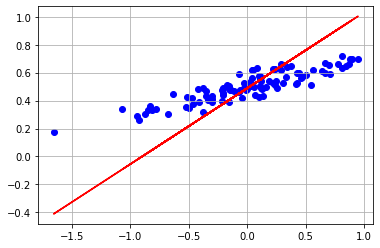

In [ ]:
y_pred = a * x + b 
xx = x.squeeze(1).data.numpy() 
yy = y_pred.squeeze(1).data.numpy()
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.plot(xx, yy, c='r')
plt.grid()

In [ ]:
for i in range(1000):
  y_pred = a * x + b
  error = torch.mean((y - y_pred) ** 2)
  optimizer.zero_grad()  # gradient 초기화 
  error.backward()  # gradient 계산 
  optimizer.step()

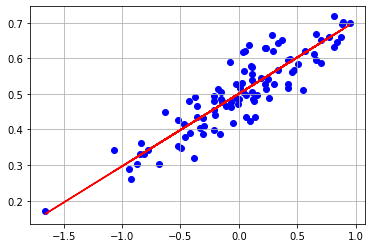

In [ ]:
y_pred = a * x + b 
xx = x.squeeze(1).data.numpy() 
yy = y_pred.squeeze(1).data.numpy()
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.plot(xx, yy, c='r')
plt.grid()

In [ ]:
print(a)

tensor([0.2036], requires_grad=True)


In [ ]:
y_pred = a * 3 + b

In [ ]:
print(y_pred)

tensor([1.1111], grad_fn=<AddBackward0>)
